In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("Data/Uber.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Uber.csv'

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.drop(["Unnamed: 0", "key"], axis = 1)

In [ ]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors = "coerce")

In [5]:
df.isnull().sum()

NameError: name 'df' is not defined

In [6]:
df["dropoff_longitude"] = df["dropoff_longitude"].fillna(df["dropoff_longitude"].mean())
df["dropoff_latitude"] = df["dropoff_latitude"].fillna(df["dropoff_latitude"].mean())

NameError: name 'df' is not defined

In [7]:
df.isnull().sum()

NameError: name 'df' is not defined

In [8]:
df["year"] = df["pickup_datetime"].dt.year
df["month"] = df["pickup_datetime"].dt.month
df["day"] = df["pickup_datetime"].dt.day
df["hour"] = df["pickup_datetime"].dt.hour

NameError: name 'df' is not defined

In [9]:
df = df.drop("pickup_datetime", axis = 1)

NameError: name 'df' is not defined

In [10]:
df.describe()

NameError: name 'df' is not defined

In [11]:
df[df["fare_amount"]<=0] = df["fare_amount"].mean()
df["passenger_count"] = df["passenger_count"].replace(to_replace = 0, value = df["passenger_count"].mean())

NameError: name 'df' is not defined

In [12]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [ lon1, lat1, lon2, lat2])
    lon_diff = lon2 - lon1
    lat_diff = lat2 - lat1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(lat_diff / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon_diff / 2.0) ** 2))
    return km

In [13]:
df["distance"] = haversine(df["pickup_longitude"], df["pickup_latitude"], df["dropoff_longitude"], df["dropoff_latitude"])

NameError: name 'df' is not defined

In [14]:
df.isnull().sum()

NameError: name 'df' is not defined

In [19]:
df["distance"].describe()

count    200000.000000
mean         20.769097
std         381.986738
min           0.000000
25%           1.215101
50%           2.120840
75%           3.875061
max       16409.239135
Name: distance, dtype: float64

In [20]:
df["distance"] = df["distance"].replace(to_replace=0, value= df["distance"].mean())
df["distance"].describe()

count    200000.000000
mean         21.356032
std         381.970330
min           0.000084
25%           1.305253
50%           2.251754
75%           4.236643
max       16409.239135
Name: distance, dtype: float64

fare_amount              Axes(0.125,0.77;0.352273x0.11)
pickup_longitude      Axes(0.547727,0.77;0.352273x0.11)
pickup_latitude         Axes(0.125,0.638;0.352273x0.11)
dropoff_longitude    Axes(0.547727,0.638;0.352273x0.11)
dropoff_latitude        Axes(0.125,0.506;0.352273x0.11)
passenger_count      Axes(0.547727,0.506;0.352273x0.11)
year                    Axes(0.125,0.374;0.352273x0.11)
month                Axes(0.547727,0.374;0.352273x0.11)
day                     Axes(0.125,0.242;0.352273x0.11)
hour                 Axes(0.547727,0.242;0.352273x0.11)
distance                 Axes(0.125,0.11;0.352273x0.11)
dtype: object

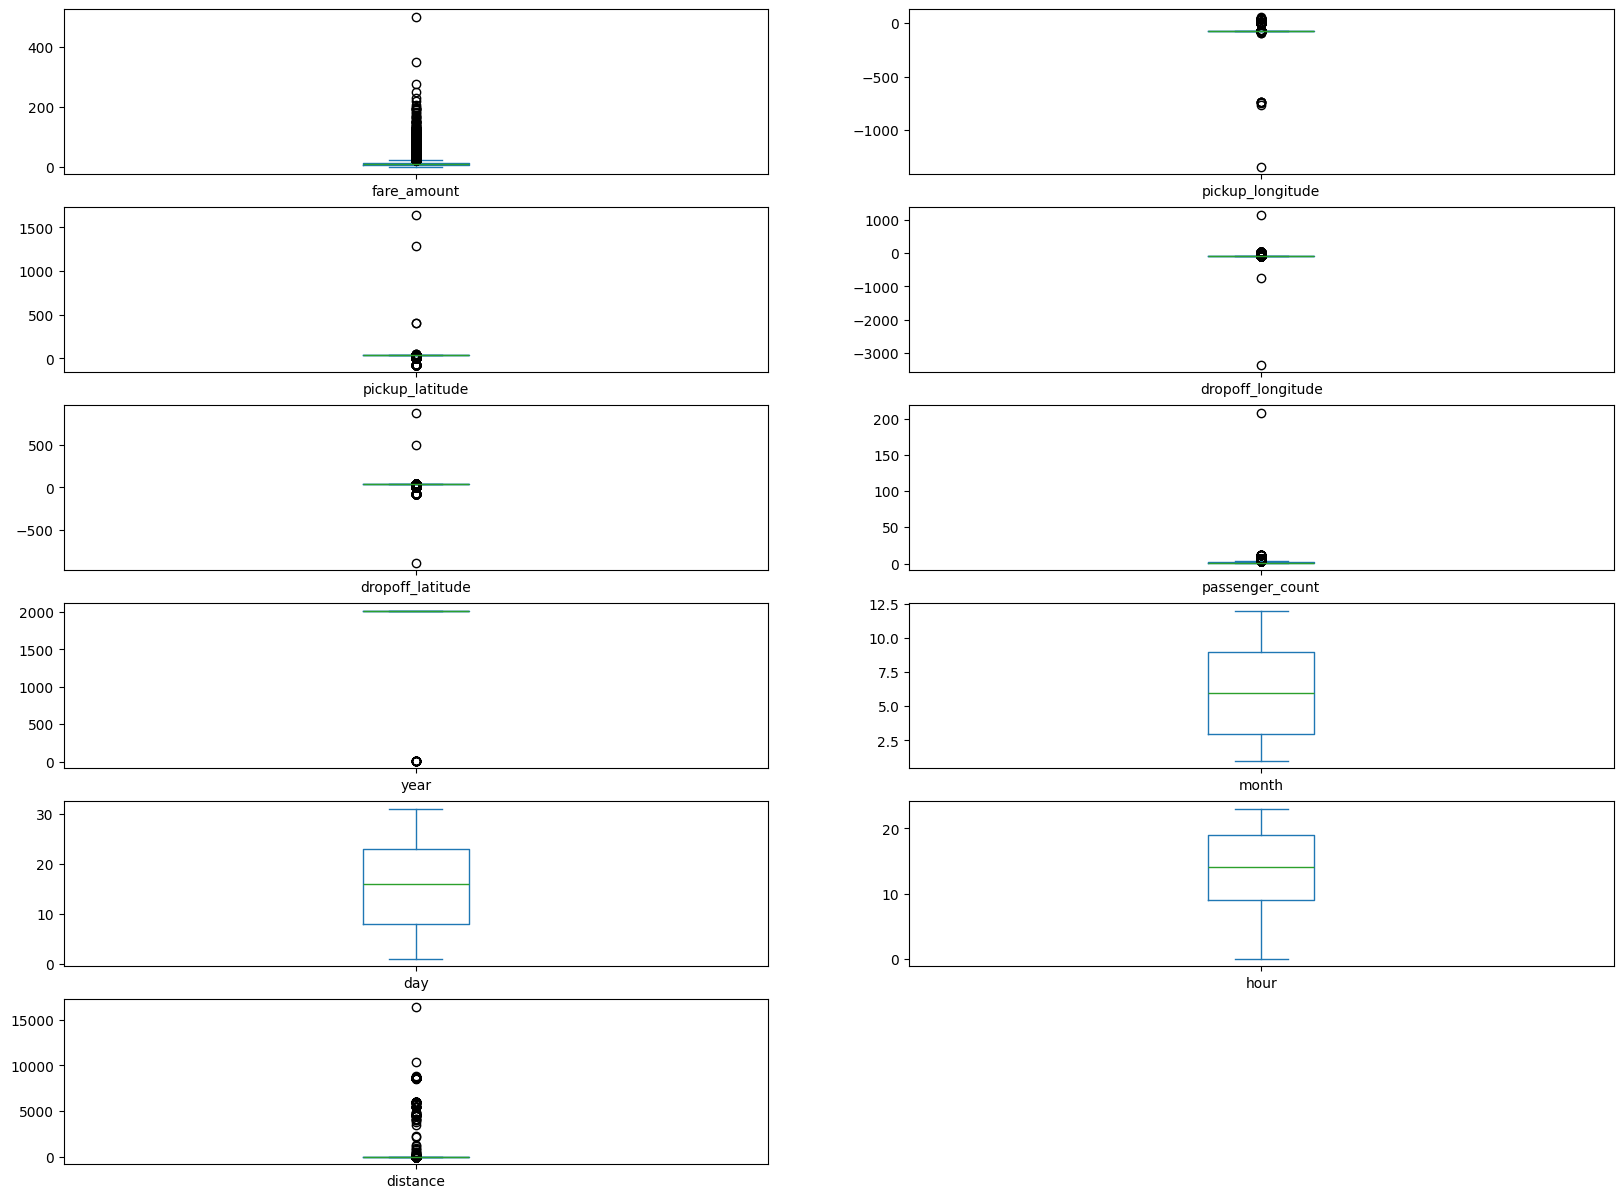

In [21]:
df.plot(kind="box", subplots = True, layout = (6, 2), figsize = (20, 15))

In [22]:
def remove_outlier(df1, c):
    q1 = df1[c].quantile(0.25)
    q3 = df1[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[c] = np.clip(df1[c], lower, upper)
    return df1

def remove_all(df1, cols):
    for c in cols:
        df1 = remove_outlier(df, c)
    return df1

In [23]:
cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'hour', 'month', 'day', 'year']
df = remove_all(df , cols)

fare_amount              Axes(0.125,0.77;0.352273x0.11)
pickup_longitude      Axes(0.547727,0.77;0.352273x0.11)
pickup_latitude         Axes(0.125,0.638;0.352273x0.11)
dropoff_longitude    Axes(0.547727,0.638;0.352273x0.11)
dropoff_latitude        Axes(0.125,0.506;0.352273x0.11)
passenger_count      Axes(0.547727,0.506;0.352273x0.11)
year                    Axes(0.125,0.374;0.352273x0.11)
month                Axes(0.547727,0.374;0.352273x0.11)
day                     Axes(0.125,0.242;0.352273x0.11)
hour                 Axes(0.547727,0.242;0.352273x0.11)
distance                 Axes(0.125,0.11;0.352273x0.11)
dtype: object

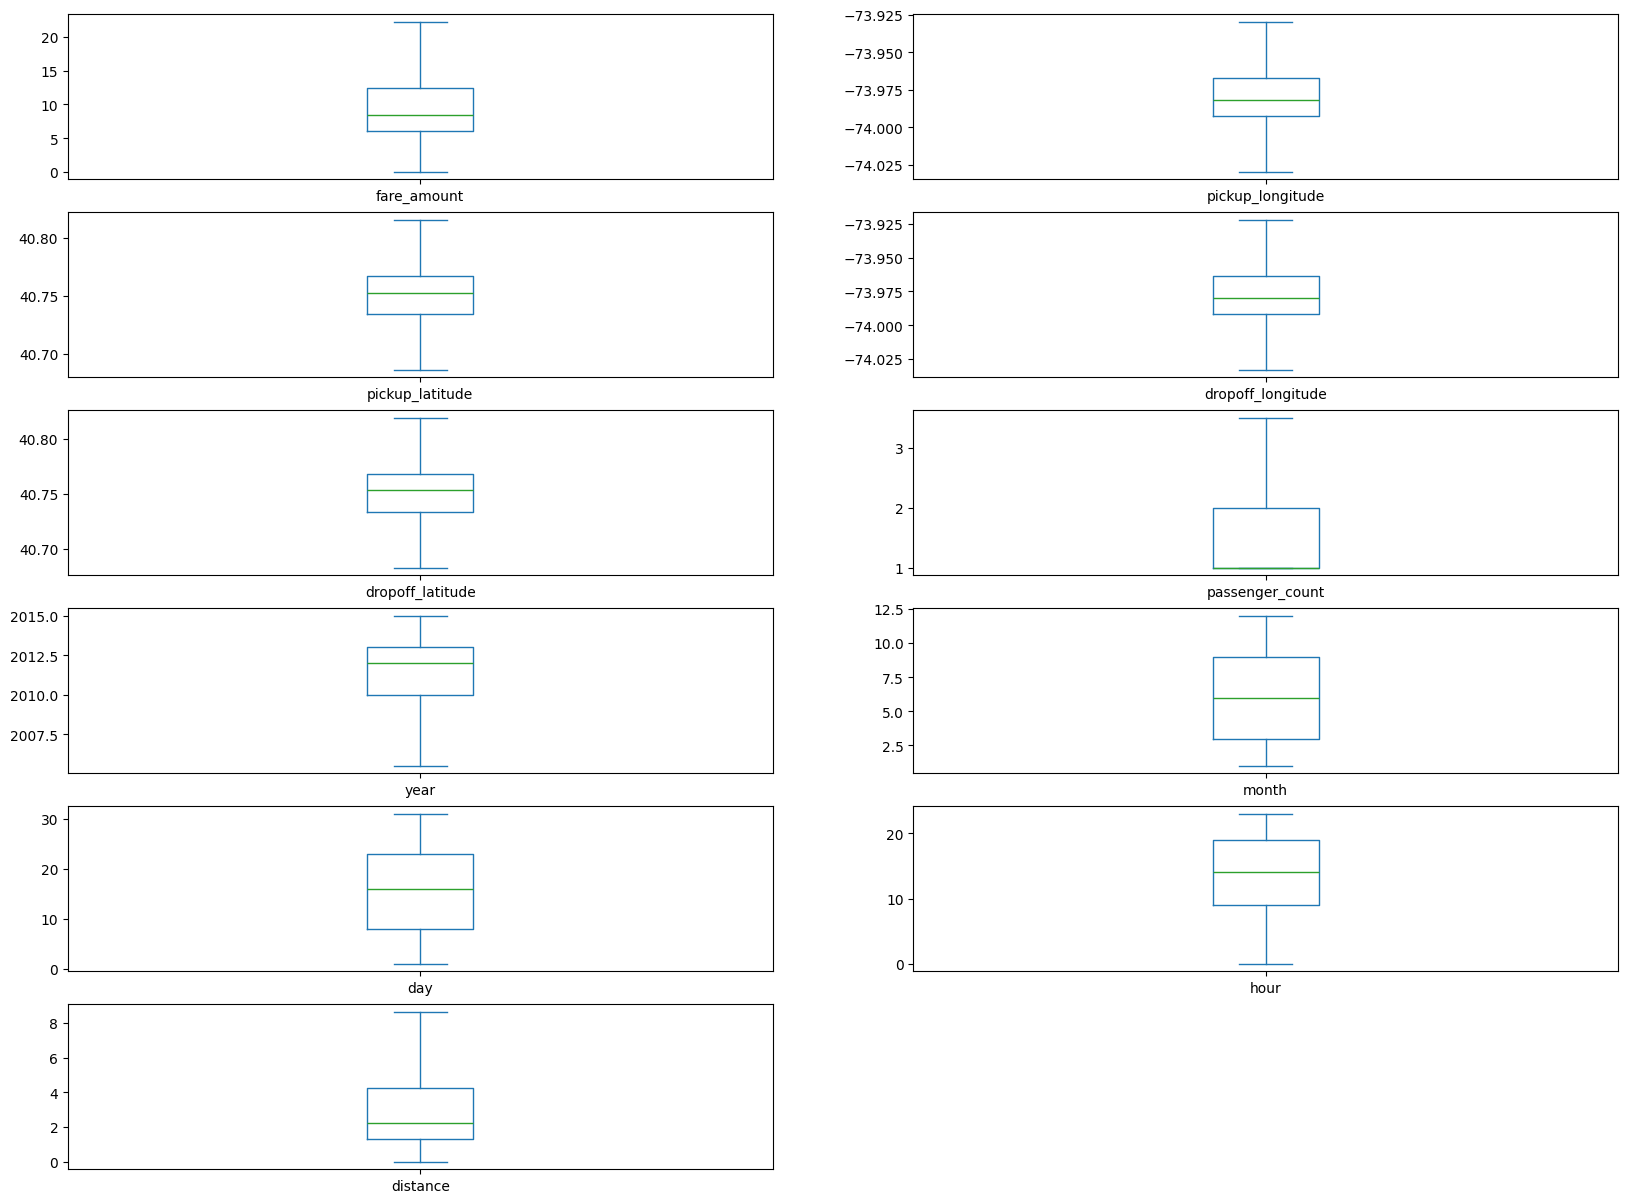

In [24]:
df.plot(kind="box", subplots = True, layout = (6, 2), figsize = (20, 15))

In [26]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,distance
fare_amount,1.000000,0.154252,-0.110928,0.218842,-0.126007,0.014678,0.141321,0.030624,0.004428,-0.023651,0.793709
pickup_longitude,0.154252,1.000000,0.258502,0.425968,0.072558,-0.012697,0.009328,0.001605,-0.003331,0.011497,0.267742
pickup_latitude,-0.110928,0.258502,1.000000,0.048070,0.516082,-0.013417,-0.013316,0.001171,-0.001391,0.029752,-0.204903
dropoff_longitude,0.218842,0.425968,0.048070,1.000000,0.244841,-0.008658,0.010409,0.002823,-0.004157,-0.046674,0.345695
dropoff_latitude,-0.126007,0.072558,0.516082,0.244841,1.000000,-0.006709,-0.008641,-0.001592,-0.003357,0.019837,-0.188099
passenger_count,0.014678,-0.012697,-0.013417,-0.008658,-0.006709,1.000000,-0.012046,0.010076,0.002439,0.019971,0.008131
year,0.141321,0.009328,-0.013316,0.010409,-0.008641,-0.012046,1.000000,-0.116291,-0.011932,0.002264,0.014281
month,0.030624,0.001605,0.001171,0.002823,-0.001592,0.010076,-0.116291,1.000000,-0.017468,-0.003986,0.012327
day,0.004428,-0.003331,-0.001391,-0.004157,-0.003357,0.002439,-0.011932,-0.017468,1.000000,0.004689,0.002747
hour,-0.023651,0.011497,0.029752,-0.046674,0.019837,0.019971,0.002264,-0.003986,0.004689,1.000000,-0.034976


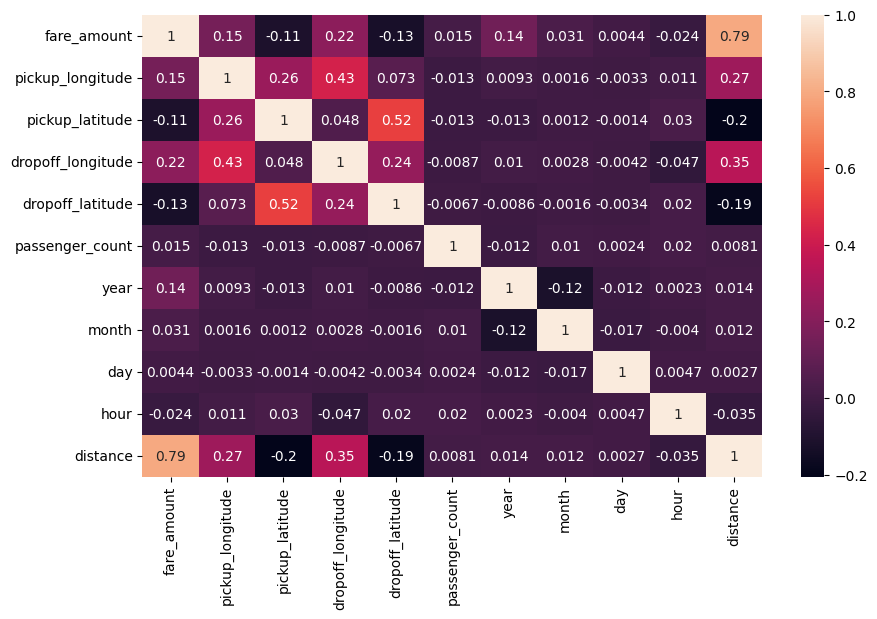

In [27]:
plt.figure(figsize= (10, 6) )
sns.heatmap(corr, annot = True)
plt.show()

In [28]:
X = df.drop("fare_amount", axis = 1)
y = df["fare_amount"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [31]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(170000, 10) (170000,) (30000, 10) (30000,)


In [32]:
linear_model = LinearRegression().fit(x_train, y_train)

In [33]:
y_pred = linear_model.predict(x_test)

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 2.09405342758708
Mean Squared Error: 10.426621600837143
Root Mean Squared Error: 3.229027965322868
R Squared (R²): 0.8052163669012191


In [35]:
random_forest = RandomForestRegressor(n_estimators = 10, random_state = 42)

random_forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [66]:
y_pred = random_forest.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1.6520310308538886
Mean Squared Error: 6.898082865341421
Root Mean Squared Error: 2.6264201616156964
R Squared (R²): 0.8759963312653414


In [67]:
random_forest.score() 